## Problema del doblado de papel
Curso: Ingeniero de Machine Learning

By: Est. Jorge Eduardo Antelo Zampieri

#### He oído que si doblas un trozo de papel constantemente, se vuelve más grueso, y si lo doblas 43 veces, alcanzará la luna. Sin embargo, es bastante difícil calcular a mano su grosor después de doblarlo 43 veces.

#### Solución: ¿Cuá es el grosor final despues de doblarlo 43 veces?
### Fórmula: el43 = el0 * 2^43

In [89]:
# Datos iniciales
g_inicial = 0.00008  #metros
n_dobles = 43  #veces
d_luna = 384400  #Kilómetros

#### Usando operadores exponenciales

In [90]:
# Cálculo de la potencia
potencia = 2 ** n_dobles
print(potencia)

8796093022208


In [91]:
# Calculo del grosor final después de doblarlo 43 veces  
g_final = g_inicial * potencia
print(f"Grosor final después de {n_dobles} dobles: {g_final:.2f} metros")

Grosor final después de 43 dobles: 703687441.78 metros


#### Usando ciclo for

In [92]:
# Ciclo for de manera directa
g_final_for1 = g_inicial
for i in range(n_dobles):
    g_final_for1 *= 2
print(f"Grosor final usando ciclo for: {g_final_for1:.2f} metros")

Grosor final usando ciclo for: 703687441.78 metros


In [93]:
# Ciclo for de manera detallada
g_final_for2 = g_inicial
for doblado in range(1, n_dobles + 1):
    g_final_for2 *= 2
    if doblado in [5, 10, 20, 30, 40, 43]:  # visualizando algunos dobles 
        print(f"Después de {doblado} dobles: {g_final_for2:.3f} metros")

Después de 5 dobles: 0.003 metros
Después de 10 dobles: 0.082 metros
Después de 20 dobles: 83.886 metros
Después de 30 dobles: 85899.346 metros
Después de 40 dobles: 87960930.222 metros
Después de 43 dobles: 703687441.777 metros


##### La distancia a la Luna es de aproximadamente 384.400 km. Veamos si el papel doblado puede llegar a la Luna

In [94]:
# Convirtiendo los metros a kilómetros
g_final_km = g_final / 1000
print(f"Grosor final: {g_final_km:.2f} kilómetros")

Grosor final: 703687.44 kilómetros


In [95]:
if g_final_km > d_luna:
    veces_mayor = g_final_km / d_luna
    diferencia_km = g_final_km - d_luna
    
    print(f"El grosor final es mayor que la distancia a la Luna.")
    print(f"Es {veces_mayor:.2f} veces mayor.")
    print(f"la diferencia es de: {diferencia_km:.2f} kilómetros.")

El grosor final es mayor que la distancia a la Luna.
Es 1.83 veces mayor.
la diferencia es de: 319287.44 kilómetros.


#### Midiendo el tiempo y otros parámetros de ambas soluciones:

In [96]:
# Importamos la librería time para medir el tiempo de ejecución
import time
from memory_profiler import memory_usage

In [97]:
#
def calc_g_final(g_inicial, n_dobles):
    potencia = 2 ** n_dobles
    return g_inicial * potencia

def calc_g_final_for1(g_inicial, n_dobles):
    g = g_inicial
    for _ in range(n_dobles):
        g *= 2
    return g

In [98]:
# Medir tiempo y memoria para g_final
start_time = time.time()
mem_usage_g_final = memory_usage((calc_g_final, (g_inicial, n_dobles)), max_iterations=1)
g_final_result = calc_g_final(g_inicial, n_dobles)
end_time = time.time()
print("Operadores Exponenciales:")
print(f"- Tiempo de ejecución : {end_time - start_time:.6f} segundos")
print(f"- Uso de memoria: {max(mem_usage_g_final) - min(mem_usage_g_final):.6f} MiB")

# Medir tiempo y memoria para g_final_for1
start_time = time.time()
mem_usage_g_final_for1 = memory_usage((calc_g_final_for1, (g_inicial, n_dobles)), max_iterations=1)
g_final_for1_result = calc_g_final_for1(g_inicial, n_dobles)
end_time = time.time()
print("Ciclo For")
print(f"- Tiempo de ejecución: {end_time - start_time:.6f} segundos")
print(f"- Uso de memoria: {max(mem_usage_g_final_for1) - min(mem_usage_g_final_for1):.6f} MiB")

Operadores Exponenciales:
- Tiempo de ejecución : 1.345874 segundos
- Uso de memoria: 0.042969 MiB
Ciclo For
- Tiempo de ejecución: 0.716205 segundos
- Uso de memoria: 0.000000 MiB


#### Visualizando el proceso

In [99]:
# importar matplotlib para graficar
import matplotlib.pyplot as plt

In [100]:
# Cremos una lista vacia
grosor_dobles = []
grosor_actual = g_inicial

# Ciclo for para calcular el grosor
for i in range(n_dobles + 1):
    grosor_dobles.append(grosor_actual)
    grosor_actual *= 2

# Lista para el eje X (número de dobles)
dobles = list(range(n_dobles + 1))

# verificamos si la lista tiene 44 valores (incluyendo el inicial)
print(f"La lista contiene 44 valores: {len(grosor_dobles) == 44}")

La lista contiene 44 valores: True


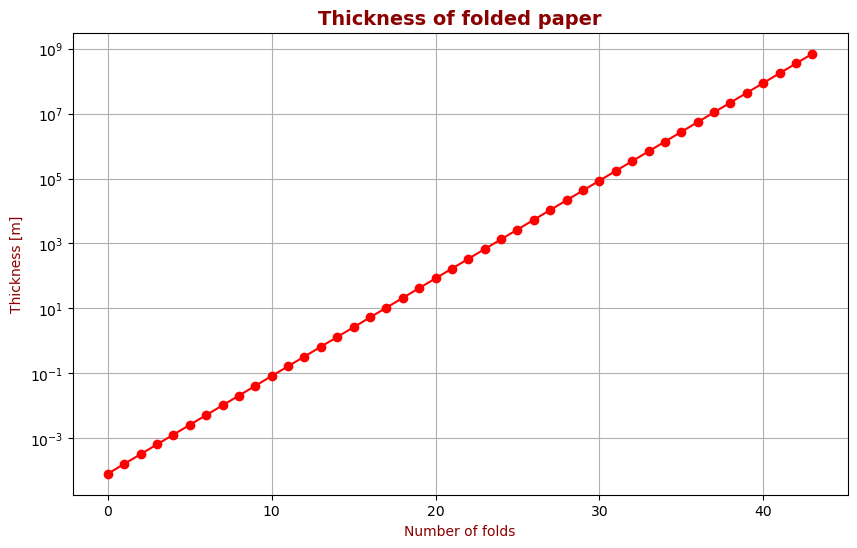

In [102]:
# Creamos el gráfico
plt.figure(figsize=(10, 6))
plt.plot(dobles, grosor_dobles, marker='o', linestyle='-', color='red')
plt.title('Thickness of folded paper', fontsize=14, fontweight='bold', color='darkred')
plt.xlabel('Number of folds', color='darkred')
plt.ylabel('Thickness [m]', color='darkred')
plt.tick_params(labelsize=10)
plt.grid(True)
plt.yscale('log')  # Escala logarítmica 
plt.savefig('Grosor_Papel_Doblado.png', dpi=400)
plt.show()